# UniRef90 - UniProt mapping Dataset Analysis


In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)
from ast import literal_eval


In [2]:
def column_stats(df, column_name):
    n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")

In [3]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

In [15]:
input_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_uniprot_hosts_pruned.csv")

In [16]:
df = pd.read_csv(input_file_path)
#df["seq_len"] = df["seq"].apply(lambda x: len(x))

In [17]:
print("df size = ", df.shape)
df.head()

df size =  (388737, 3)


,uniref90_id,tax_id,host_tax_ids
0,UniRef90_L0BZH8,11676,[9606]
1,UniRef90_A0A023GZ41,12315,"[4627, 41568, 4688, 4081]"
2,UniRef90_L0BZI0,11676,[9606]
3,UniRef90_L0BZI1,11676,[9606]
4,UniRef90_L0BZI3,11676,[9606]


In [18]:
column_stats(df, "tax_id")

Number of unique values = 1983
       tax_id  tax_id_count  tax_id_percent
0       11676        318863       82.025380
1       10407         13898        3.575168
2       11646          2576        0.662659
3       11723          2027        0.521432
4       28344          1728        0.444516
5       11709          1599        0.411332
6       10497          1150        0.295830
7       10310           977        0.251327
8       10298           881        0.226631
9     1678143           813        0.209139
10     549779           811        0.208624
11      11250           785        0.201936
12     212035           762        0.196019
13      10359           659        0.169523
14     558016           638        0.164121
15    2697049           565        0.145342
16      12475           562        0.144571
17     181083           561        0.144314
18     693272           542        0.139426
19     455367           511        0.131451
20     455364           510        0.131194
2

In [24]:
column_stats(df, "virus_host_name")

Number of unique values = 139
                virus_host_name  virus_host_name_count  virus_host_name_percent
0                  Homo sapiens                 338132                91.259510
1               Pan troglodytes                  16951                 4.574959
2                    Sus scrofa                   2547                 0.687418
3                  Mus musculus                   1251                 0.337636
4        Potamochoerus larvatus                   1044                 0.281768
5      Phacochoerus aethiopicus                   1044                 0.281768
6        Phacochoerus africanus                   1044                 0.281768
7                 Gallus gallus                    834                 0.225091
8          Chlorocebus aethiops                    828                 0.223472
9         Cercopithecus hamlyni                    815                 0.219963
10        Bandicota bengalensis                    812                 0.219153
11        

min seq len = 11
max seq len = 7217


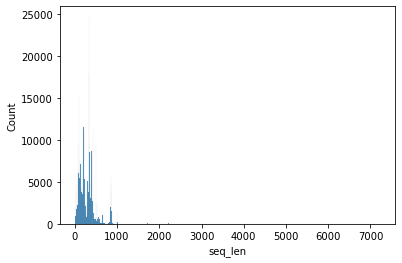

     start     end   count  percentage
0     11.0   611.5  343915   92.820302
1    611.5  1212.0   25516    6.886594
2   1212.0  1812.5     608    0.164095
3   1812.5  2413.0     335    0.090414
4   2413.0  3013.5      97    0.026180
5   3013.5  3614.0      14    0.003779
6   3614.0  4214.5      16    0.004318
7   4214.5  4815.0      10    0.002699
8   4815.0  5415.5       0    0.000000
9   5415.5  6016.0       0    0.000000
10  6016.0  6616.5       0    0.000000
11  6616.5  7217.0       6    0.001619


In [27]:
print_seq_len_histogram(df, n_bins=12)